## BTC/USD Dataset Exploration

##### Short dataset description
Dataset was sourced from kaggle : https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd?resource=download&select=BTC-Hourly.csv. It cointains hourly historical data of the pair BTC/USD. Data are retrieved from Gemini (crypto cex). The columns of the data contain :

1) **open** price of the hourly candle
2) **close** price of the hourly candle
3) **low** price (min) of the hourly candle
4) **high** price (max) of the hourly candle
5) **volume** volume during the candle denominated in the respective currency

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the data

In [73]:
df = pd.read_csv('BTC-Hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.drop(["unix", "symbol"], axis = 1)
df = df.sort_values(by='date')

In [75]:
df.head(100)

,date,open,high,low,close,Volume BTC,Volume USD
33258,2018-05-15 06:00:00,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93
33257,2018-05-15 07:00:00,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
33256,2018-05-15 08:00:00,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
33255,2018-05-15 09:00:00,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
33254,2018-05-15 10:00:00,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69
...,...,...,...,...,...,...,...
33163,2018-05-19 05:00:00,8228.13,8250.00,8217.32,8240.83,735602.44,89.42
33162,2018-05-19 06:00:00,8240.83,8250.86,8213.52,8214.90,407218.44,49.47
33161,2018-05-19 07:00:00,8214.90,8235.77,8141.08,8170.07,1635561.11,200.05
33160,2018-05-19 08:00:00,8170.07,8232.12,8146.10,8229.87,2084416.27,254.37


#### Check for nulls

In [46]:
df.isnull().sum()

date          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

#### Basic analysis

In [38]:
print("There are",df.shape[0],"entries in this dataset.")

There are 33259 entries in this dataset.


In [39]:
print("Starting date is :",df['date'].min())
print("Ending date is :",df['date'].max())
print("A total of",(df['date'].max()-df['date'].min()).days, "days is recorded")
print("A total of",(df['date'].max()-df['date'].min()).total_seconds()//3600, "hours is recorded")

Starting date is : 2018-05-15 06:00:00
Ending date is : 2022-03-01 00:00:00
A total of 1385 days is recorded
A total of 33258.0 hours is recorded


In [40]:
print("Lowest btc price recorded is:",df["low"].min(),"usd.")
print("Highest btc price recorded is:",df["high"].max(),"usd.")

Lowest btc price recorded is: 3122.28 usd.
Highest btc price recorded is: 69000.0 usd.


#### Visualization 

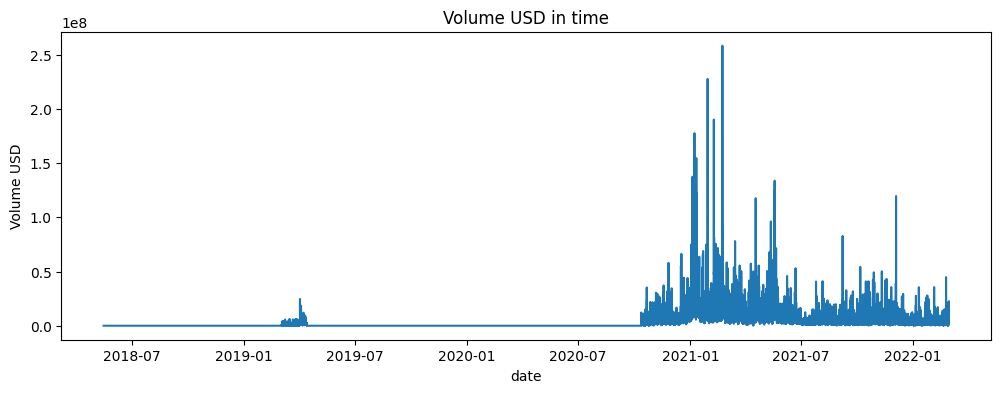

In [59]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['Volume USD'])

# Adding labels and title
plt.xlabel('date')
plt.ylabel('Volume USD')
plt.title('Volume USD in time')

# Displaying the plot
plt.show()

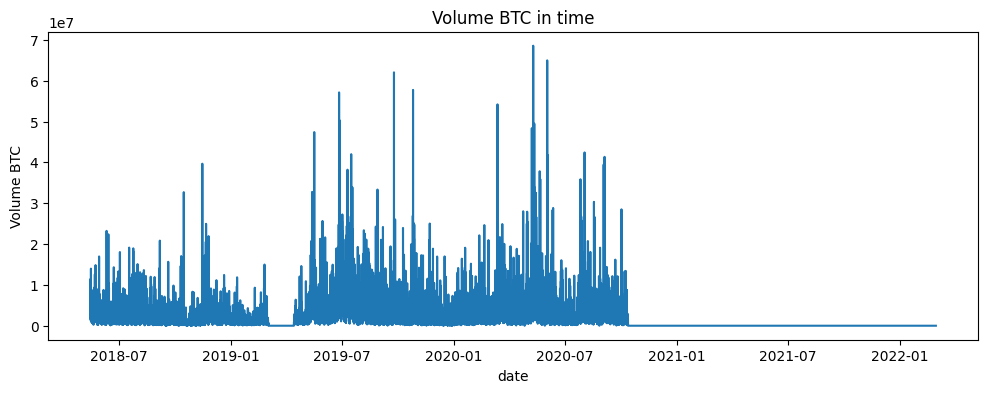

In [60]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['Volume BTC'])

# Adding labels and title
plt.xlabel('date')
plt.ylabel('Volume BTC')
plt.title('Volume BTC in time')

# Displaying the plot
plt.show()

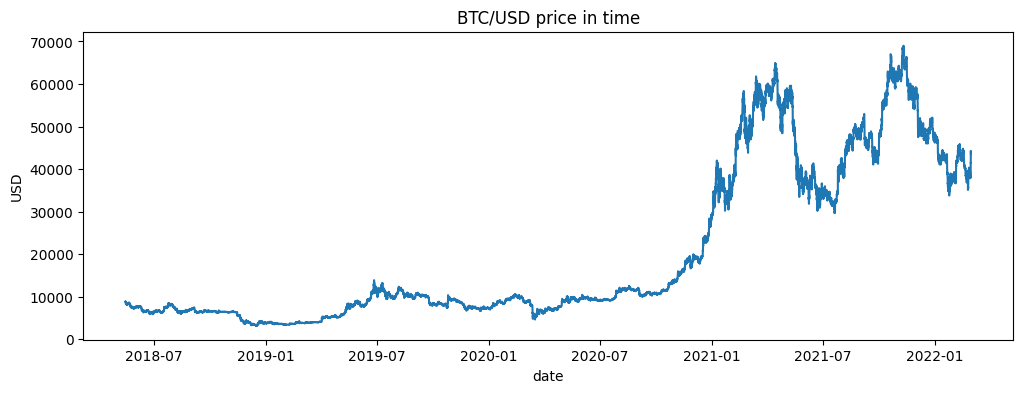

In [57]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['high'])

# Adding labels and title
plt.xlabel('date')
plt.ylabel('USD')
plt.title('BTC/USD price in time')

# Displaying the plot
plt.show()

#### Get out of sample data

In [64]:
import requests, json

base_url = "https://api.gemini.com/v2"
response = requests.get(base_url + "/candles/btcusd/1hr")
btc_candle_data = response.json()

print(len(btc_candle_data))

1464


In [66]:
data_new = data_pd = pd.DataFrame(btc_candle_data, columns=['unix', 'open', 'high', 'low', 'close', 'volume'])
data_new['date'] = pd.to_datetime(data_new['unix'], unit='ms')                                                 

In [70]:
data_new['date'].min()

Timestamp('2023-04-18 16:00:00')

In [71]:
data_new['date'].max()

Timestamp('2023-06-18 15:00:00')

In [72]:
data_new.head()

,unix,open,high,low,close,volume,date
0,1687100400000,26531.06,26559.99,26521.79,26559.06,3.030377,2023-06-18 15:00:00
1,1687096800000,26486.93,26561.27,26458.05,26531.06,0.809743,2023-06-18 14:00:00
2,1687093200000,26544.90,26547.21,26486.93,26486.93,1.207658,2023-06-18 13:00:00
3,1687089600000,26504.79,26544.90,26443.23,26544.90,12.166121,2023-06-18 12:00:00
4,1687086000000,26519.34,26519.34,26476.71,26504.79,0.400629,2023-06-18 11:00:00
